# Kaggle competition
competition on link: https://www.kaggle.com/competitions/home-data-for-ml-course/data

## 1. Import libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

LOCATION = 'data'
MOST_ONE_VALUE_PERCENT = 96

In [2]:
train = pd.read_csv(LOCATION + '/train.csv', index_col=0)
test = pd.read_csv(LOCATION + '/test.csv', index_col=0)

In [3]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 80)

In [5]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
X = pd.concat([train.drop("SalePrice", axis=1),test], axis=0)
y = train[['SalePrice']].copy()

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

In [8]:
numeric_data = X.select_dtypes(exclude=['object']).drop('MSSubClass', axis=1).copy()
numeric_data.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,548.0,0,61,0,0,0,0,0,2,2008
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,460.0,298,0,0,0,0,0,0,5,2007
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,608.0,0,42,0,0,0,0,0,9,2008
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,642.0,0,35,272,0,0,0,0,2,2006
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,836.0,192,84,0,0,0,0,0,12,2008


In [9]:
categorical_data = X.select_dtypes(include='object').copy()
categorical_data['MSSubClass'] = X['MSSubClass']
categorical_data.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,60
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,20
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,60
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,70
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,60


In [10]:
discrete_vars = ['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']

numeric_vars = []
for column_name in numeric_data.columns:
    if column_name not in discrete_vars:
        numeric_vars.append(column_name)

## 2. Check data and visualize

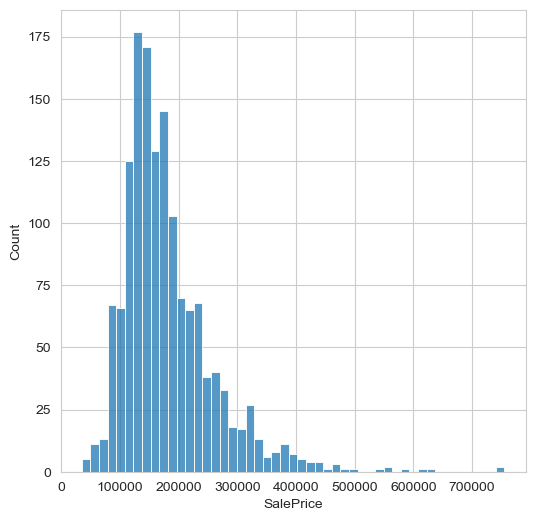

In [11]:
plt.figure(figsize=(6, 6))
sns.histplot(train['SalePrice'])
plt.show()

## 2.1 Numeric features
Check some features with histograms and boxplots to identify irrelevant signs. And ofc we need to mark it for pipeline level.

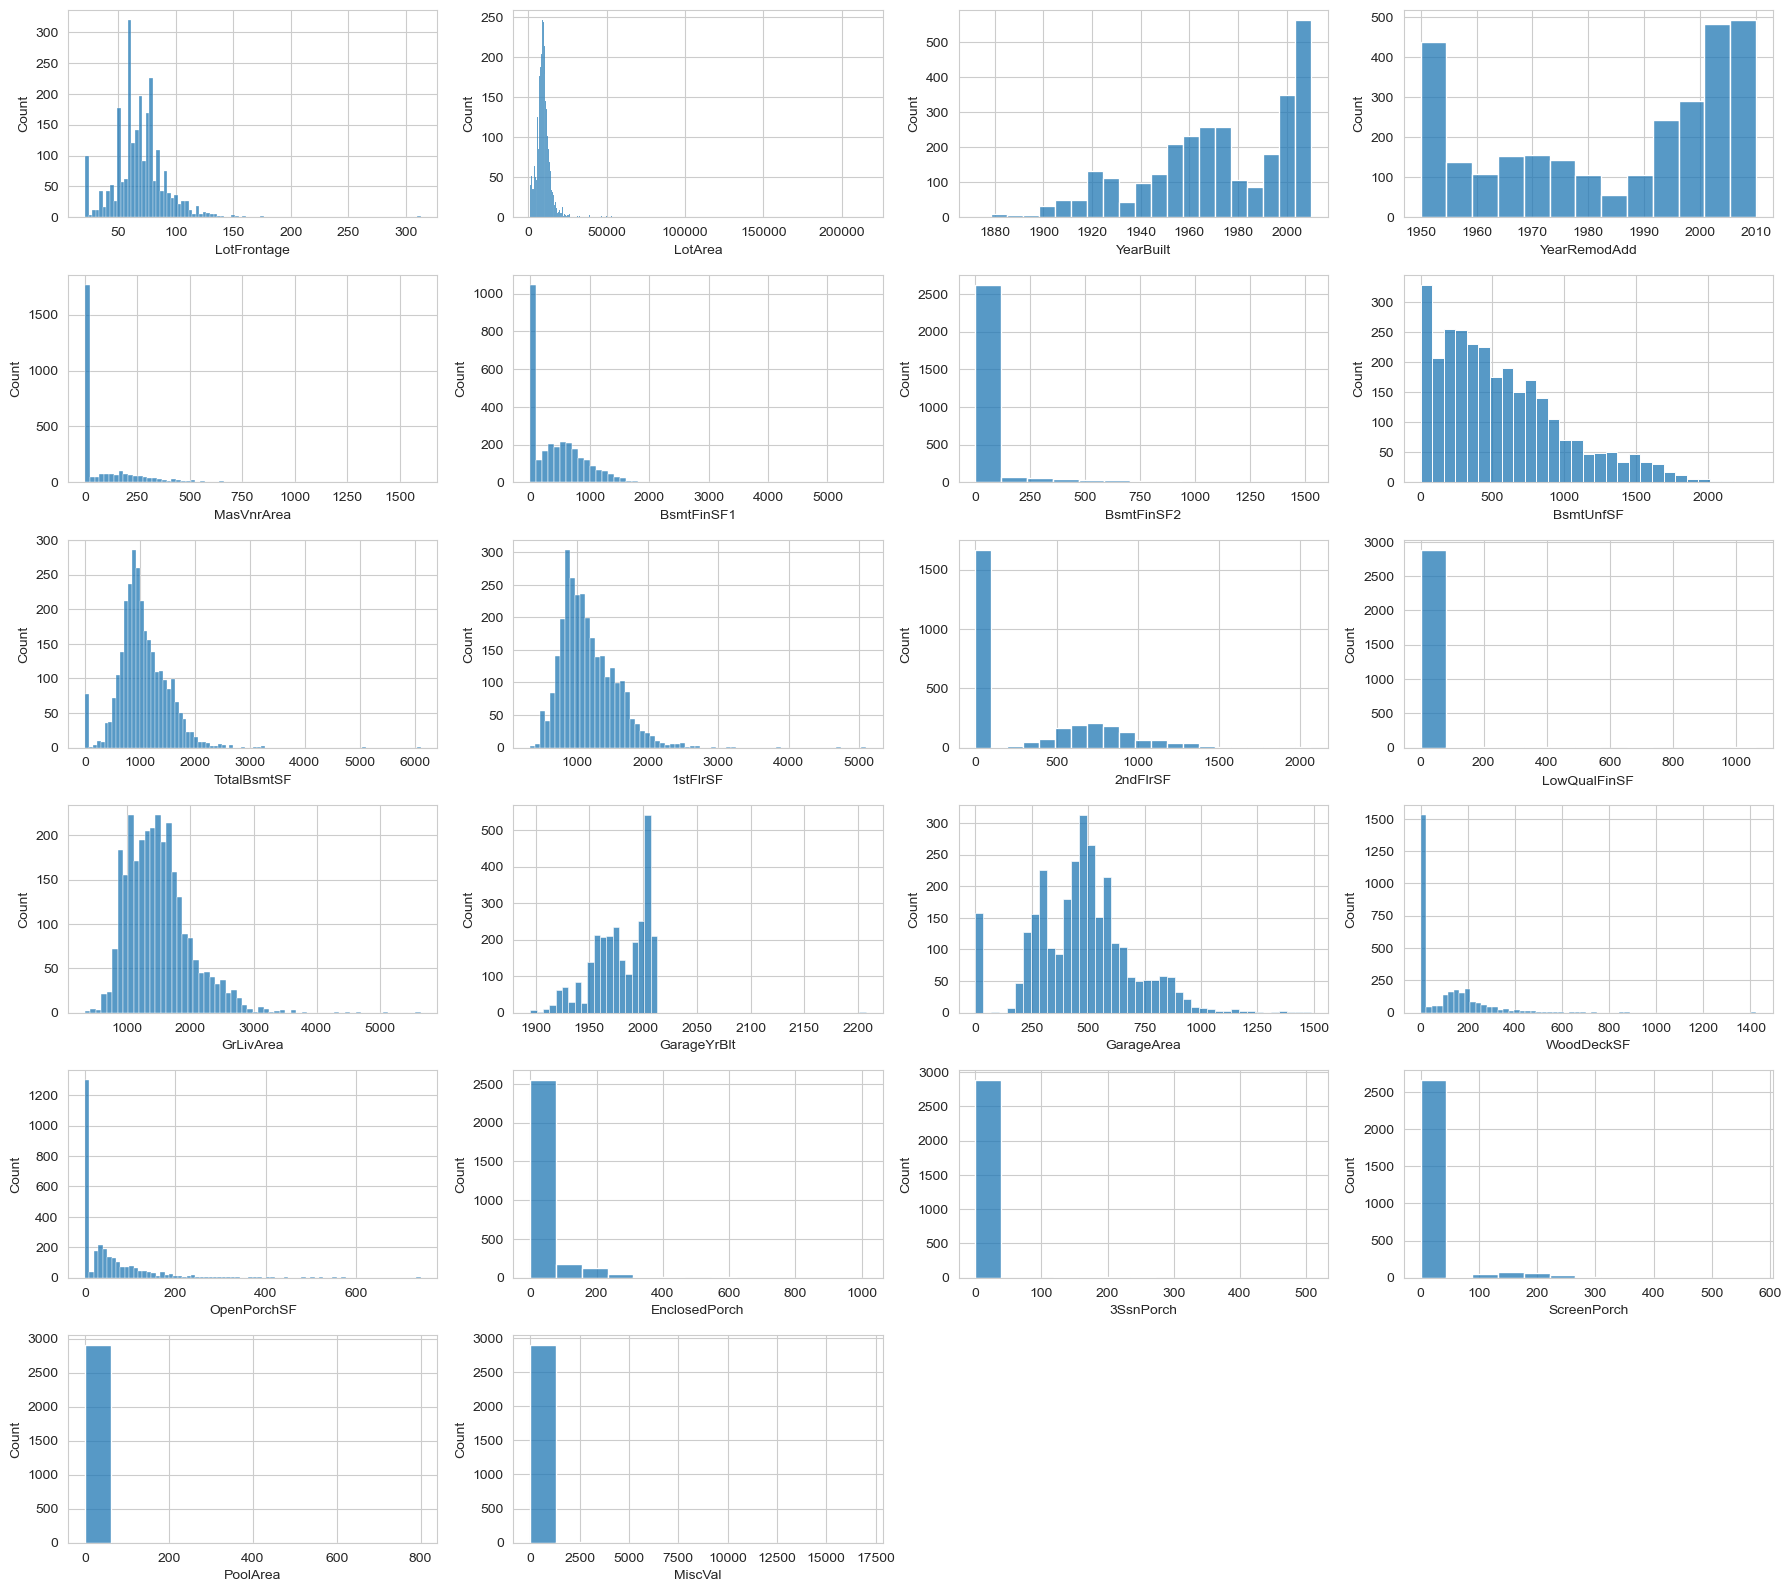

In [12]:
figure = plt.figure(figsize=(18, 16))
for i, item in enumerate(numeric_vars):
    plt.subplot(6, 4, i + 1)
    sns.histplot(numeric_data.loc[:, item].dropna(), kde=False)
figure.tight_layout(pad=1)
plt.show()

In last steps i need to delete from dataset next variables: "BsmFinSF2", "LowQualSinSF", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal". These variables occupy insignificant or near-zero (default) values.

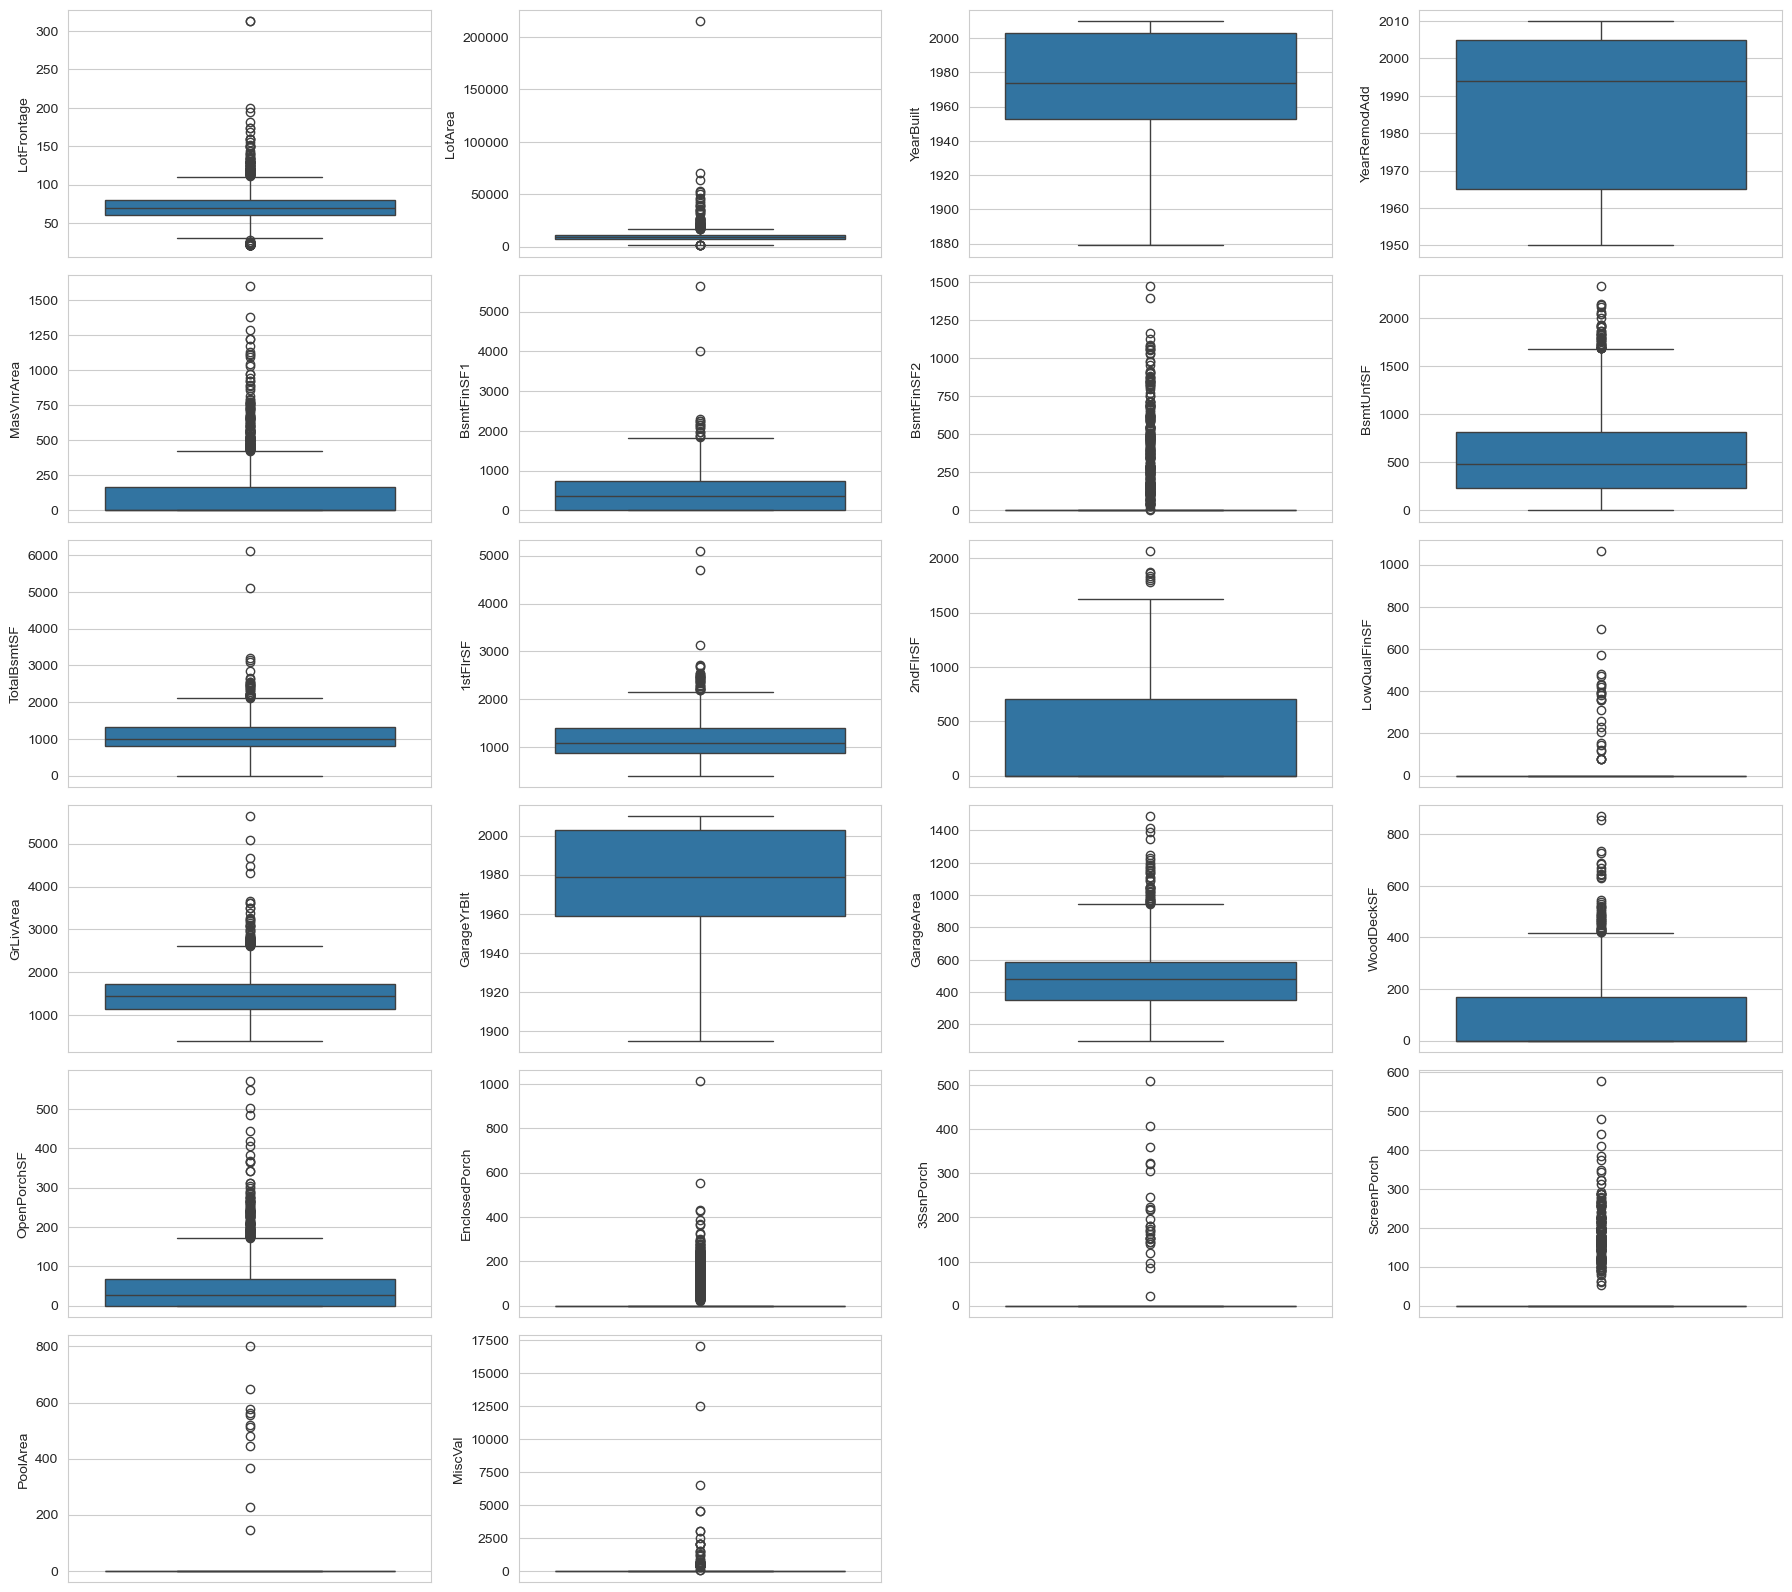

In [13]:
figure = plt.figure(figsize=(18, 16))
for i, item in enumerate(numeric_vars):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(y=item, data=numeric_data.dropna())
figure.tight_layout(pad=1)
plt.show()

With these plots I can say that I need to add "EnclosedPorch" to the list higher.

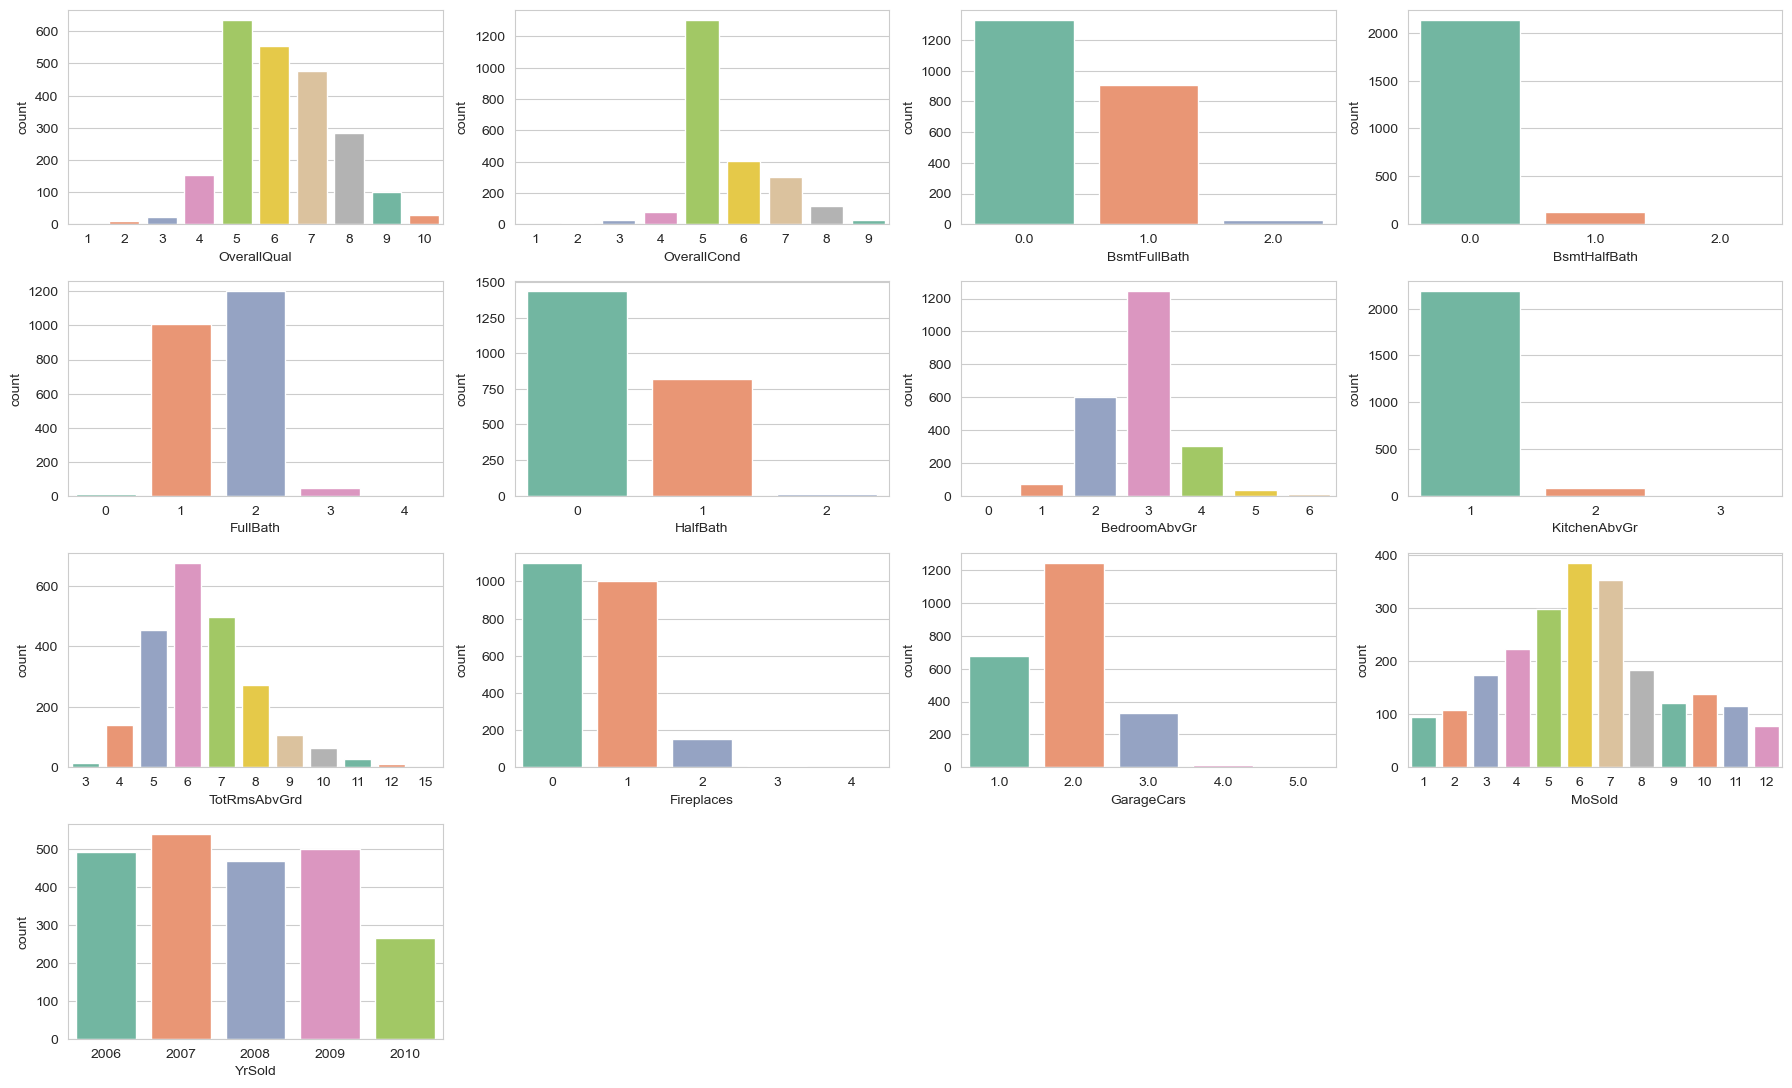

In [14]:
figure = plt.figure(figsize=(18, 16))
for i, item in enumerate(discrete_vars):
    sp = plt.subplot(6, 4, i + 1)
    sns.countplot(x=item, data=numeric_data.dropna(), hue=item, palette='Set2')
    sp.legend().remove()
figure.tight_layout(pad=1)
plt.show()

## 2.2 Categorical features
Use the same logic with numeric features, but with countplot.

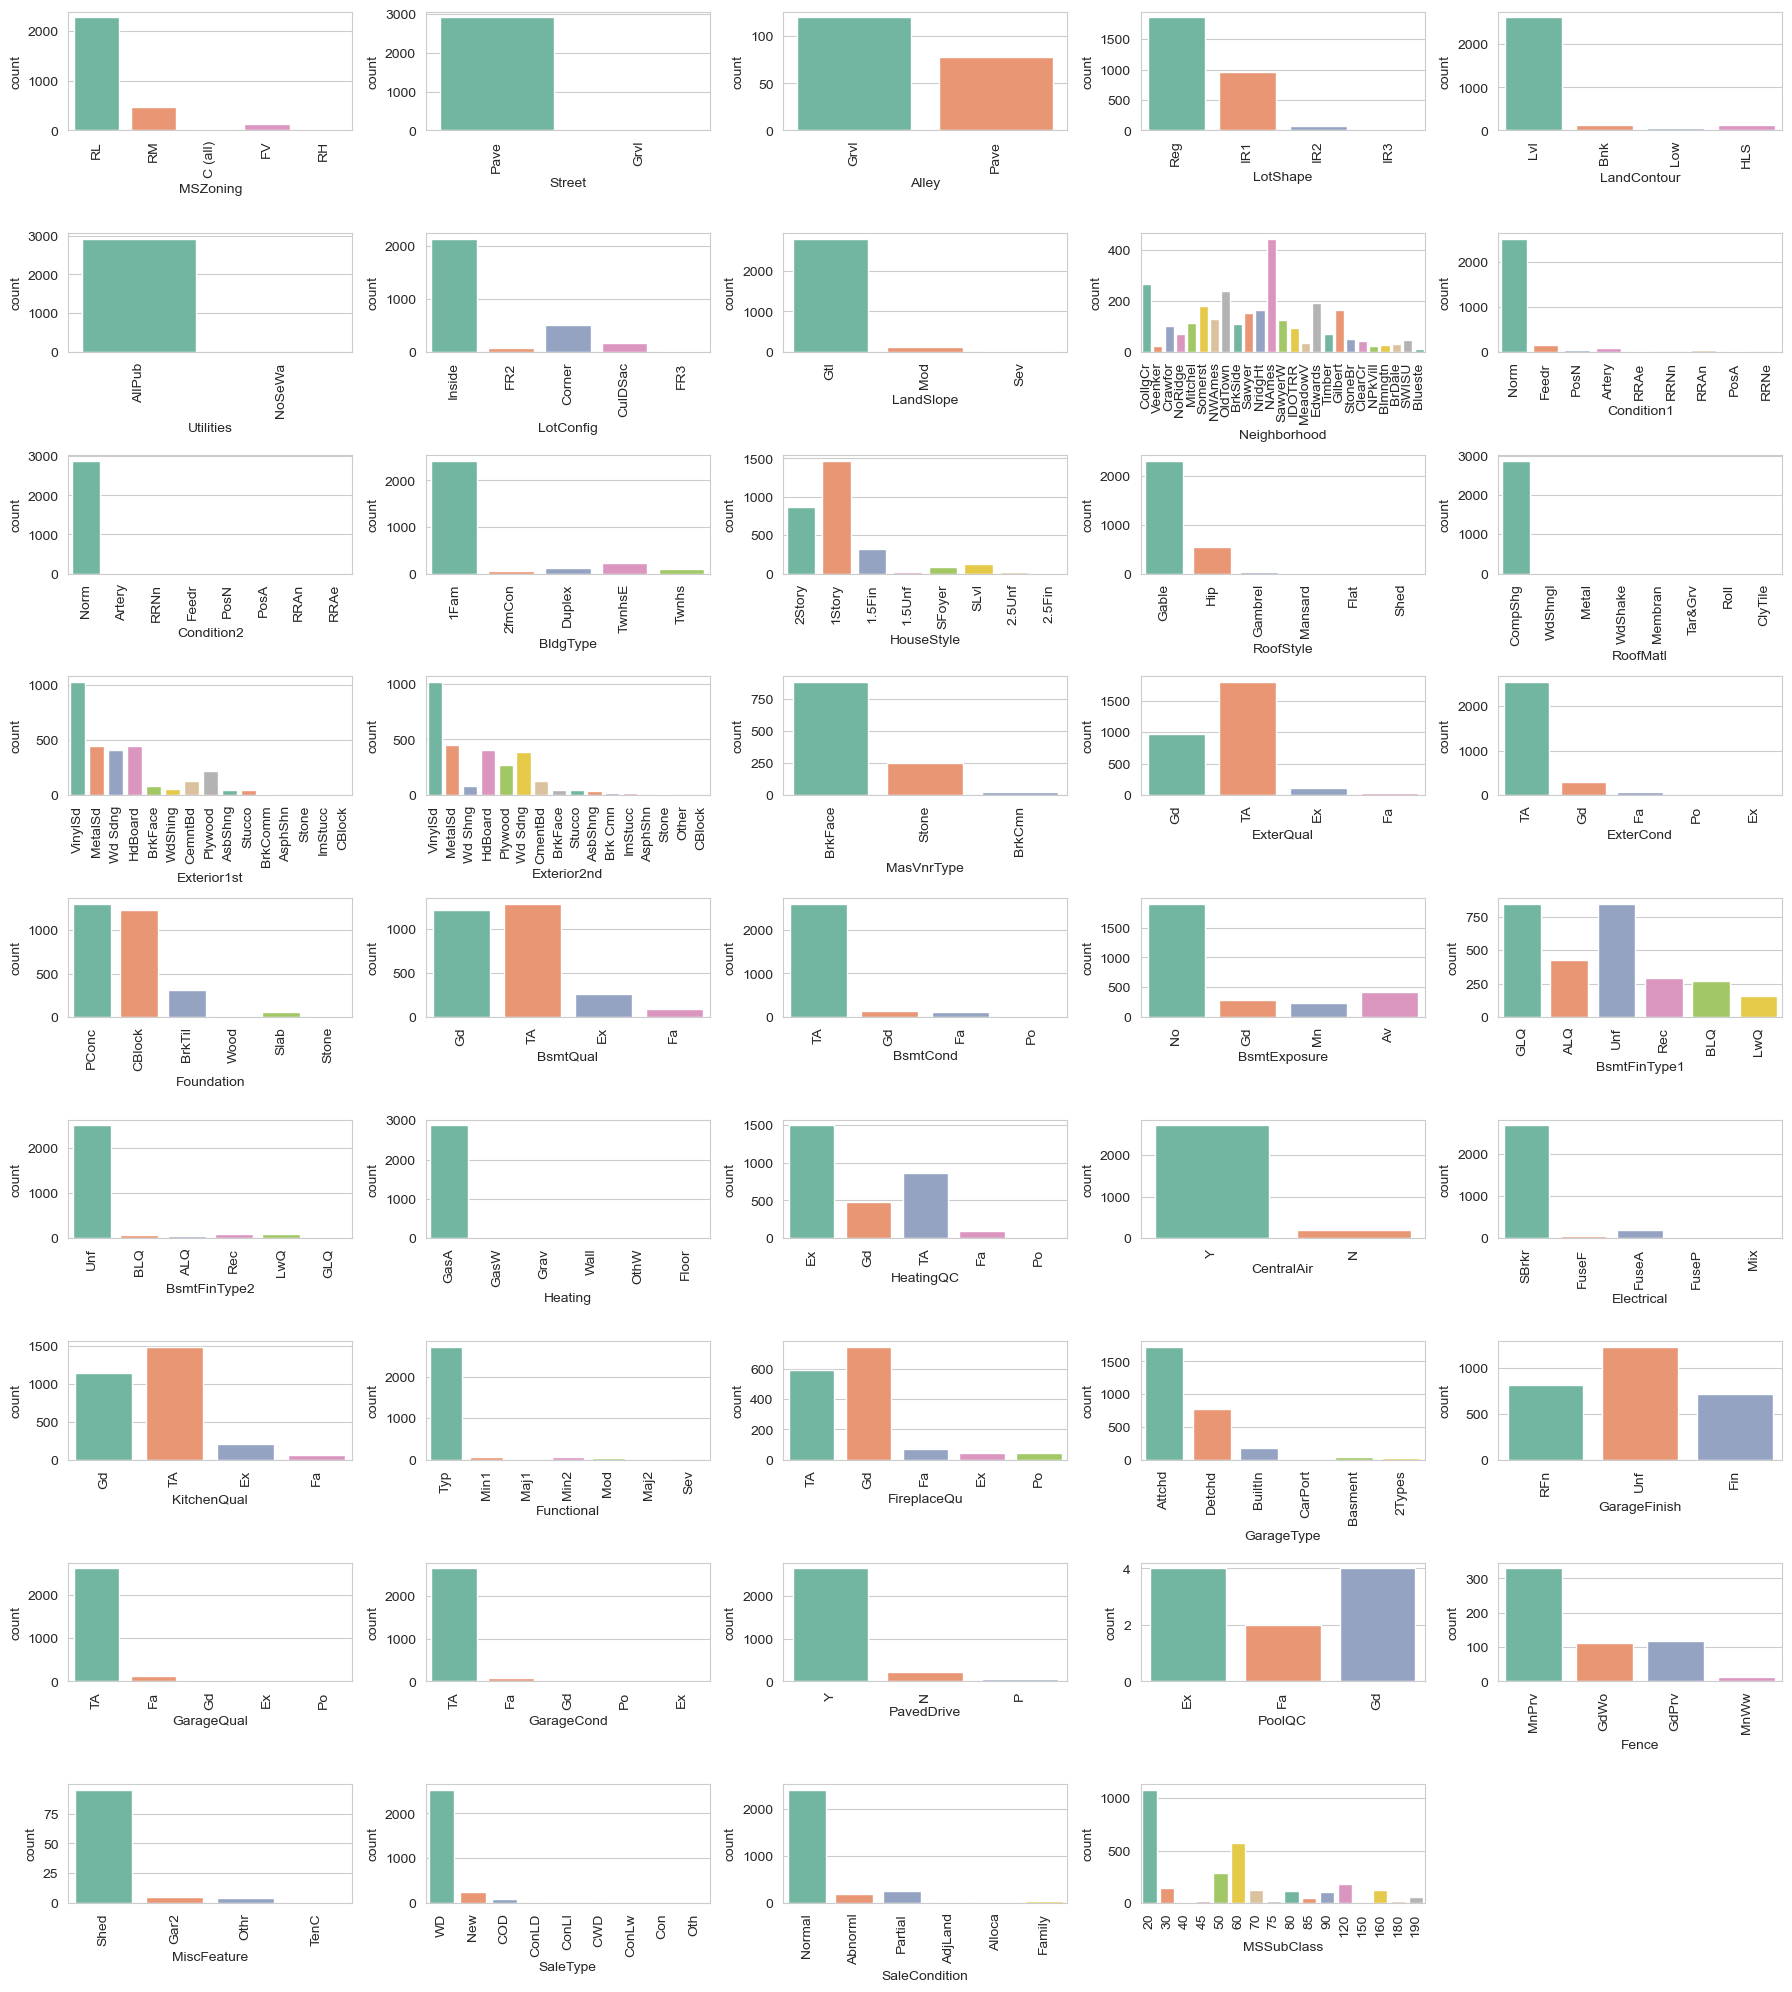

In [15]:
figure = plt.figure(figsize=(18, 20))
num_plots = len(categorical_data.columns)

for index in range(num_plots):
    sp = plt.subplot(9, 5, index + 1)
    data = categorical_data.iloc[:, index]
    sns.countplot(x=data, data=categorical_data.dropna(), hue=data, palette='Set2')
    plt.xticks(rotation=90)
    if sp.get_legend() : sp.legend().remove()

figure.tight_layout(pad=1)
plt.show()


## 2.3 Heat map
Maybe one of the best ways to check correlated variables and use some feature engineering with them

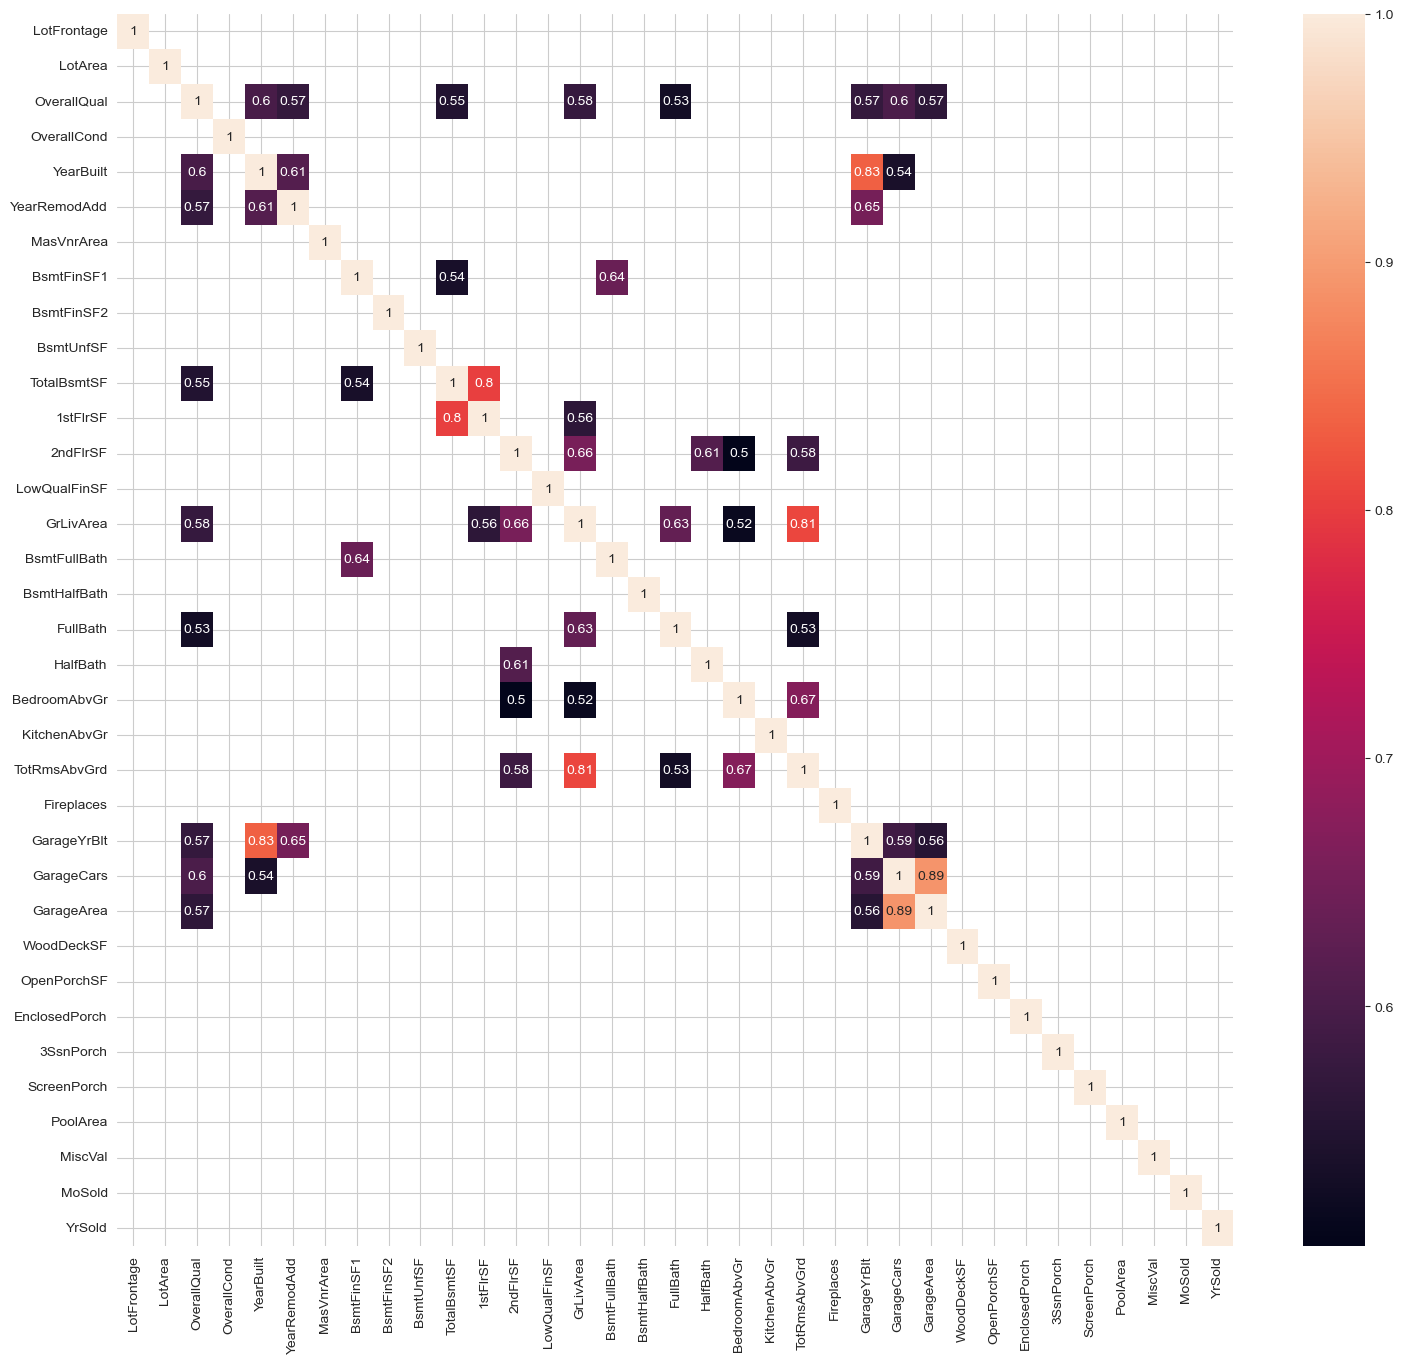

In [16]:
figure = plt.figure(figsize=(18, 16))
corr = numeric_data.corr()
sns.heatmap(data=corr, annot=True, mask=corr < 0.5)
plt.show()

There are 4 most correlated vars:
- 1stFlrSF with TotalBsmtSF
- GarageYrBlt with YearBuilt
- TotRmsAbvGrd with GrLivArea
- GarageArea with GarageCars

## 2.4 Some correlations

In [17]:
numeric_train = train.select_dtypes(exclude=['object'])
corr = numeric_train.corr()
corr[['SalePrice']].sort_values(['SalePrice'], ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


## 2.5 Scatterplot
We can add some dots on plots to check some dependencies (f.e. exponential)

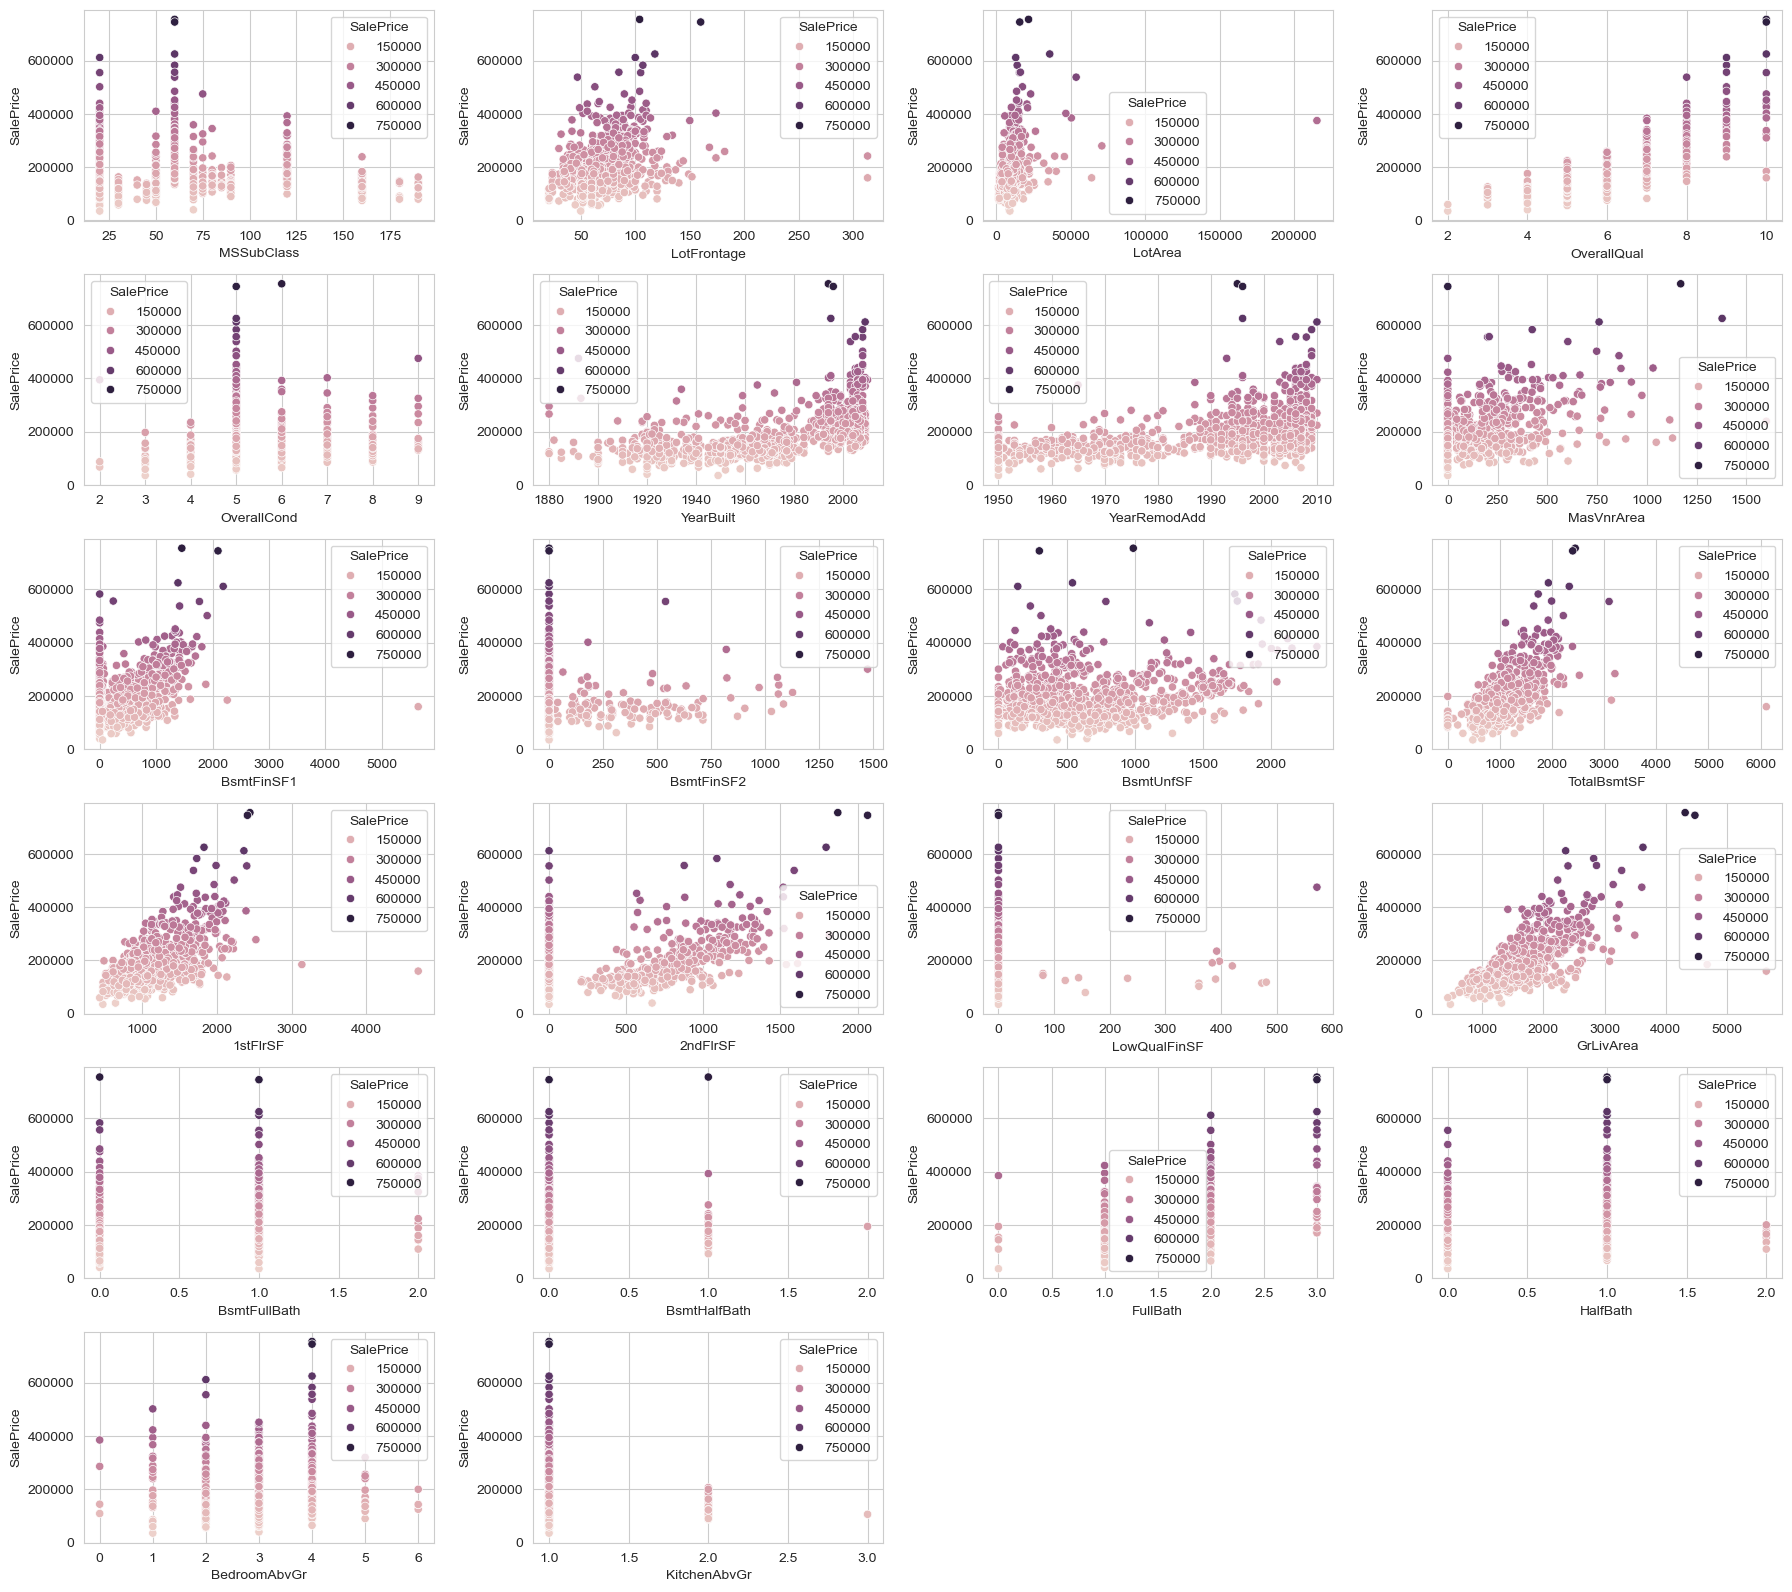

In [18]:
figure = plt.figure(figsize=(18, 16))
for index in range(len(numeric_vars)):
    sb = plt.subplot(6, 4, index + 1)
    sns.scatterplot(x=numeric_train.iloc[:, index], y='SalePrice', hue='SalePrice', data=numeric_train.dropna())
figure.tight_layout(pad=1)
plt.show()

## 3. Data processing

## 3.1 Removing some features
First of all we need to delete most collinearity features

In [19]:
X.drop(['GarageYrBlt','TotRmsAbvGrd','1stFlrSF','GarageCars'], axis=1, inplace=True)

Now we need to remove features with most missing values

In [20]:
missing_counts = X.isnull().sum()
missing_counts_sorted = missing_counts.sort_values(ascending=False)

In [21]:
X.shape

(2919, 75)

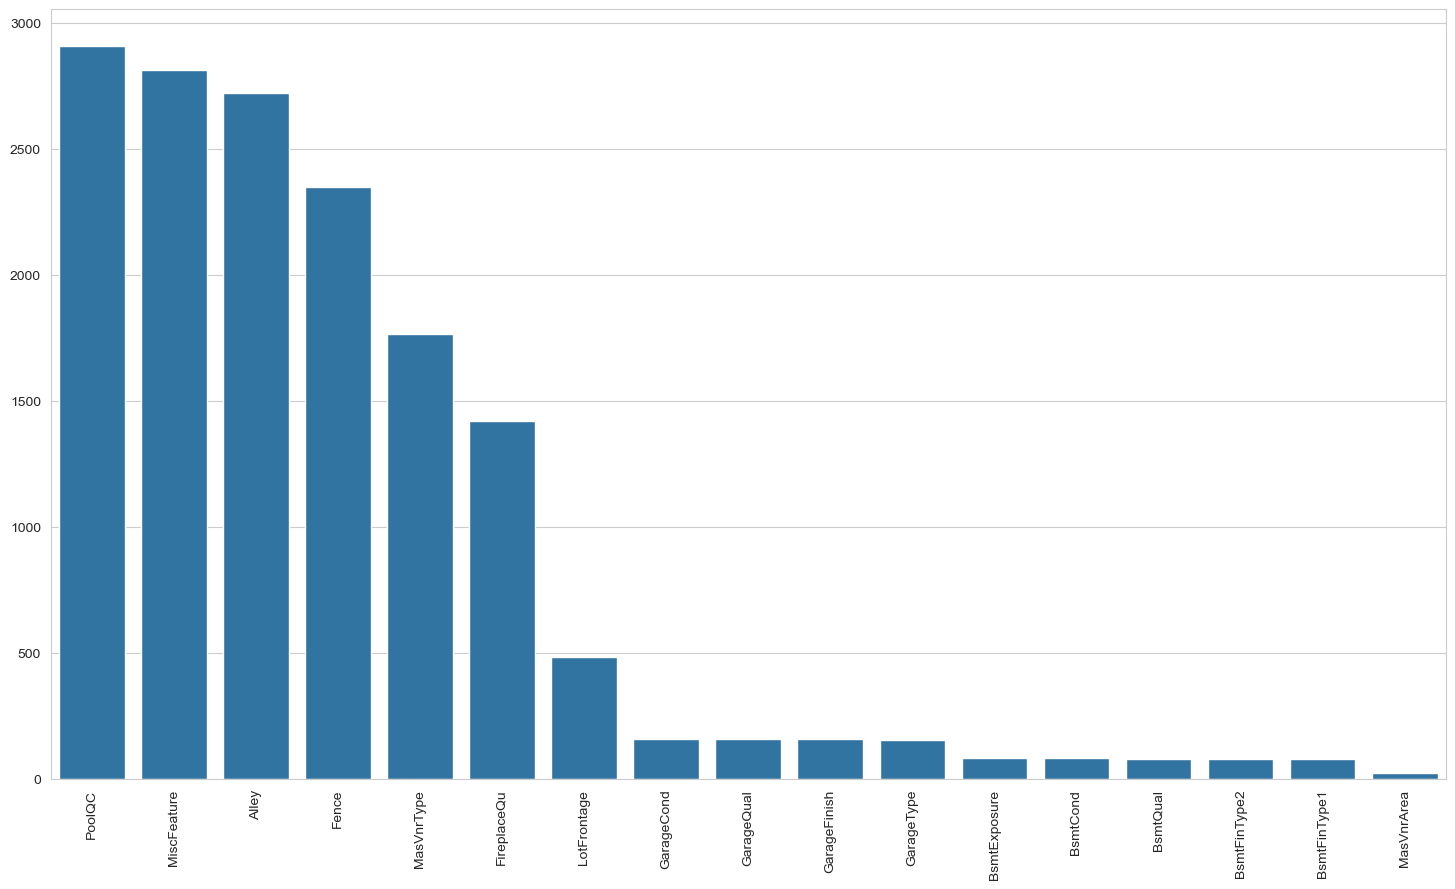

In [22]:
plt.figure(figsize=(18, 10))
sns.barplot(missing_counts_sorted.loc[missing_counts_sorted > 10])
plt.xticks(rotation=90)
plt.show()

In [23]:
X.drop(['PoolQC', "MiscFeature", "Alley", "Fence"], axis=1, inplace=True)

/opt/miniconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


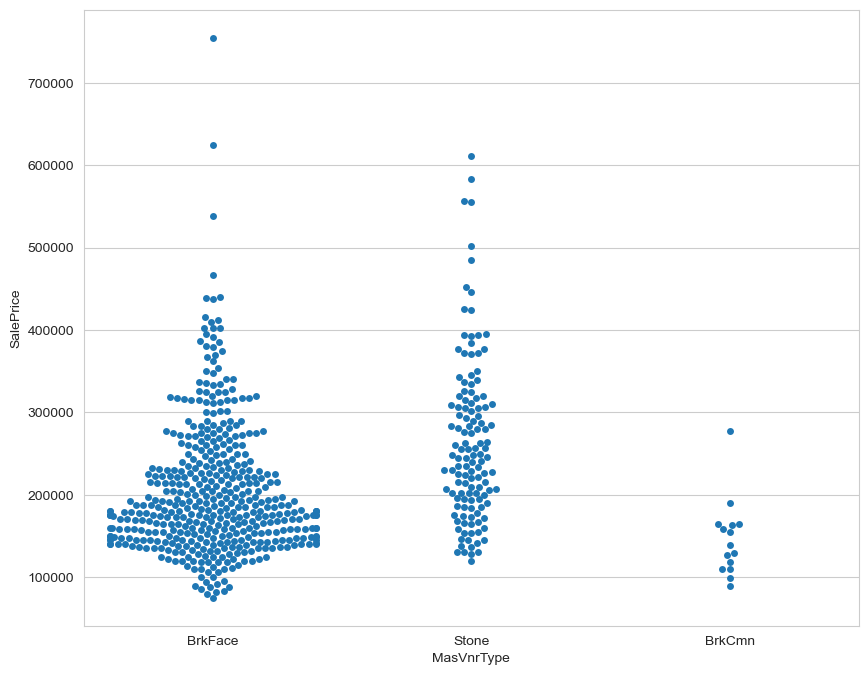

In [24]:
plt.figure(figsize=(10, 8))
sns.swarmplot(x='MasVnrType', y='SalePrice', data=train)
plt.show()

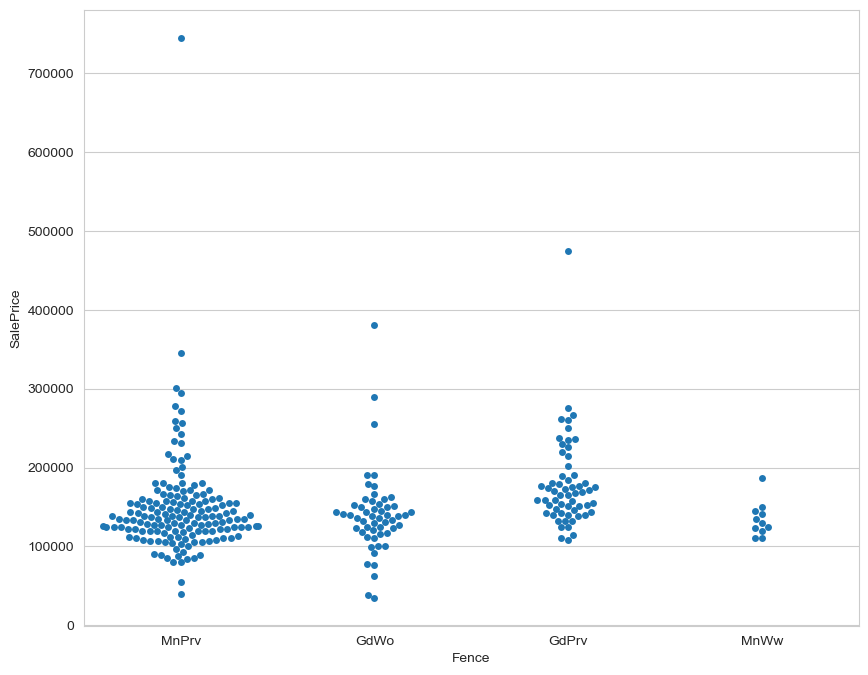

In [25]:
plt.figure(figsize=(10, 8))
sns.swarmplot(x='Fence', y='SalePrice', data=train)
plt.show()

Remove features with mostly 1 value

In [26]:
categorical_columns = X.select_dtypes(include='object').columns
overfit_categorical = []
for column in categorical_columns:
    counts = X[column].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > MOST_ONE_VALUE_PERCENT:
        overfit_categorical.append(column)

X = X.drop(overfit_categorical, axis=1)

In [27]:
numeric_columns = X.select_dtypes(exclude='object').columns
overfit_numeric = []
for column in numeric_columns:
    counts = X[column].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > MOST_ONE_VALUE_PERCENT:
        overfit_numeric.append(column)

X = X.drop(overfit_numeric, axis=1)

In [28]:
print(f'Categorical overfit columns: {overfit_categorical}, '
      f'percent - {len(overfit_categorical) / len(categorical_columns) * 100:.2f}%')
print(f'Numerical overfit columns: {overfit_numeric}, '
      f'percent - {len(overfit_numeric) / len(numeric_columns) * 100:.2f}%')

Categorical overfit columns: ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating'], percent - 12.82%
Numerical overfit columns: ['LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal'], percent - 12.50%


## 3.2 Remove outliners

In [29]:
X = X.drop(X[X['LotFrontage'] > 200].index)
X = X.drop(X[X['LotArea'] > 100000].index)
# X = X.drop(X[X['BsmtFinSF1'] > 4000].index)
# X = X.drop(X[X['TotalBsmtSF'] > 5000].index)
# X = X.drop(X[X['GrLivArea'] > 5000].index)

In [30]:
X.shape

(2913, 62)

## 3.3 Fill missing values

In [31]:
pd.DataFrame(X.isnull().sum(), columns=['sum']).sort_values(by=['sum'],ascending=False).head(15)

,sum
MasVnrType,1763
FireplaceQu,1420
LotFrontage,483
GarageCond,159
GarageQual,159
GarageFinish,159
GarageType,157
BsmtExposure,82
BsmtCond,82
BsmtQual,81


In [32]:
categorical_columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [33]:
categorical = ['GarageType','GarageFinish','BsmtFinType2','BsmtExposure','BsmtFinType1',
               'GarageCond','GarageQual','BsmtCond','BsmtQual','FireplaceQu',"KitchenQual",
               "HeatingQC",'ExterQual','ExterCond']

X[categorical] = X[categorical].fillna("NA")

In [34]:
cols = ["MasVnrType", "MSZoning", "Exterior1st", "Exterior2nd", "SaleType", "Electrical", "Functional"]
modes = train.groupby("Neighborhood")[cols].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

def fillna_with_train_modes(row):
    for col in cols:
        if pd.isna(row[col]) and row["Neighborhood"] in modes.index:
            row[col] = modes.loc[row["Neighborhood"], col]
    return row

X = X.apply(fillna_with_train_modes, axis=1)

Fill numerical (some correlations)

In [35]:
means_by_neighborhood = train.groupby('Neighborhood')['LotFrontage'].mean()

X['LotFrontage'] = X.apply(
    lambda row: means_by_neighborhood.loc[row['Neighborhood']] if pd.isna(row['LotFrontage']) and row['Neighborhood'] in means_by_neighborhood.index else row['LotFrontage'],
    axis=1
)

In [36]:
modes_by_subclass = train.groupby('MSSubClass')['MSZoning'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

X['MSZoning'] = X.apply(
    lambda row: modes_by_subclass.loc[row['MSSubClass']] if pd.isna(row['MSZoning']) and row['MSSubClass'] in modes_by_subclass.index else row['MSZoning'],
    axis=1
)


Fill other numerical

In [37]:
cont = ["BsmtHalfBath", "BsmtFullBath", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "MasVnrArea"]
means_cont = train[cont].mean()
X[cont] = X[cont].fillna(means_cont)

## 3.4 Map ordinal features

In [38]:
from sklearn.preprocessing import OrdinalEncoder
ord_encoder = OrdinalEncoder()
ord_cols = ['ExterQual','ExterCond','BsmtQual', 'BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond', 'FireplaceQu']

X[ord_cols] = ord_encoder.fit_transform(X[ord_cols])

# 4. Feature engineering

In [39]:
X['TotalLot'] = X['LotFrontage'] + X['LotArea']
X['TotalBsmtFin'] = X['BsmtFinSF1'] + X['BsmtFinSF2']
X['TotalSF'] = X['TotalBsmtSF'] + X['2ndFlrSF']
X['TotalBath'] = X['FullBath'] + X['HalfBath']
X['TotalPorch'] = X['OpenPorchSF'] + X['EnclosedPorch'] + X['ScreenPorch']

In [40]:
X['MSSubClass'] = X['MSSubClass'].apply(str)

## 4.1 Normalize 'SalePrice'

<Figure size 600x600 with 0 Axes>

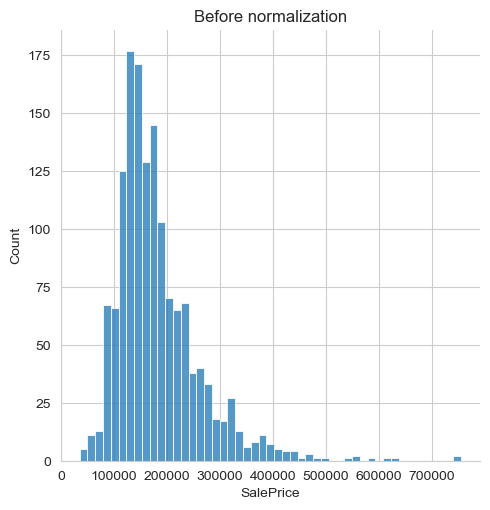

In [41]:
plt.figure(figsize=(6, 6))
sns.displot(y['SalePrice'])
plt.title('Before normalization')
plt.show()

In [42]:
y['SalePrice'] = np.log(y['SalePrice'])

<Figure size 600x600 with 0 Axes>

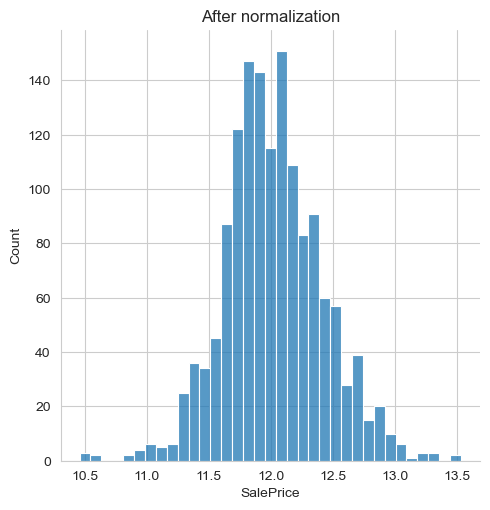

In [43]:
plt.figure(figsize=(6, 6))
sns.displot(y['SalePrice'])
plt.title('After normalization')
plt.show()

In [44]:
y

,SalePrice
Id,
1,12.247694
2,12.109011
3,12.317167
4,11.849398
5,12.429216
...,...
1456,12.072541
1457,12.254863
1458,12.493130


In [45]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# y['SalePrice'] = scaler.fit_transform(y[['SalePrice']])

In [46]:
# y[['SalePrice']]

In [47]:
# plt.figure(figsize=(6, 6))
# sns.histplot(y['SalePrice'])
# plt.title('After scaler')
# plt.show()

In [48]:
X = pd.get_dummies(X)

In [49]:
common_index = X.index.intersection(y.index).intersection(train.index)
x = X.loc[common_index]
y = y.loc[common_index]


In [50]:
test = X.loc[test.index]

In [51]:
from sklearn.preprocessing import RobustScaler

cols = x.select_dtypes(np.number).columns
transformer = RobustScaler().fit(x[cols])
x[cols] = transformer.transform(x[cols])
test[cols] = transformer.transform(test[cols])

# 5. Modeling
---

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## 5.1 Train the XGBoost regression model

In [53]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(booster='gbtree', objective='reg:squarederror')

In [54]:
from sklearn.model_selection import GridSearchCV

# params = {
#     'learning_rate' : [0.01, 0.1, 0.15, 0.3, 0.5],
#     'n_estimators' : [100, 500, 1000, 2000, 3000, 5000, 10000],
#     'max_depth' : [2, 3, 6, 9],
#     'min_child_weight' : [1, 5, 10, 20],
#     'reg_alpha' : np.arange(0.1, 1.2, 0.2),
#     'reg_lambda' : np.arange(0.1, 1.2, 0.2)
# }

best_params = {
    'learning_rate': [0.01],
    'max_depth': [2],
    'min_child_weight': [1],
    'n_estimators': [5000],
    'reg_alpha': [0.5],
    'reg_lambda': [0.3],
    'subsample': [0.8],
    'colsample_bytree': [0.1]
}

xgb_grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=best_params,
    cv=5,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error'
)

xgb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster='gbtree',
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=No...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.1], 'learning_rate': [0.01],
                         'max_depth': [2], 'min_child_weight': [1],
                         'n_estimators': [5000], 'reg_alpha': [0.5],
                         'reg_lambda': [0.3], 'subsample': [0.8]},
             scoring='neg_root_mean_squared_error')

In [55]:
xgb_grid_search.best_params_


{'colsample_bytree': 0.1,
 'learning_rate': 0.01,
 'max_depth': 2,
 'min_child_weight': 1,
 'n_estimators': 5000,
 'reg_alpha': 0.5,
 'reg_lambda': 0.3,
 'subsample': 0.8}

In [56]:
xgb_grid_search.best_score_

-0.12439210218199519

In [57]:
xgb_finetune_model = XGBRegressor(booster='gbtree', objective='reg:squarederror', **xgb_grid_search.best_params_)

## 5.2 Train the CatBoost regression model

In [58]:
from catboost import CatBoostRegressor

cbr_model = CatBoostRegressor(loss_function='RMSE', logging_level='Silent')

In [59]:
from sklearn.model_selection import RandomizedSearchCV

# param_lst = {
#     'n_estimators' : [100, 300, 500, 1000, 1300, 1600],
#     'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
#     'l2_leaf_reg' : [0.001, 0.01, 0.1],
#     'random_strength' : [0.25, 0.5 ,1],
#     'max_depth' : [3, 6, 9],
#     'min_child_samples' : [2, 5, 10, 15, 20],
#     'rsm' : [0.5, 0.7, 0.9],
#
# }

# One of the random best parameters
best_params = {
    'rsm': 0.7,
    'random_strength': 1,
    'n_estimators': 1600,
    'min_child_samples': 10,
    'max_depth': 6,
    'learning_rate': 0.01,
    'l2_leaf_reg': 0.001
}

# Fast grid search, but may impact on final model
# catboost_search = RandomizedSearchCV( estimator = cbr_model, param_distributions = param_lst,
#                                       n_iter = 100, scoring = 'neg_root_mean_squared_error',
#                                       cv = 5, n_jobs = -1)
#
# catboost_search.fit(X_train, y_train)
#
# best_param = catboost_search.best_params_
cbr_finetune_model = CatBoostRegressor(logging_level='Silent', **best_params)

In [60]:
# best_param

## 5.3 Get some predictions

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

def mean_cross_val(model, X, y):
    score = cross_val_score(model, X, y, cv=5)
    mean = score.mean()
    return mean

cbr_finetune_model.fit(X_train, y_train)
preds = cbr_finetune_model.predict(X_test)
preds_test_cb = cbr_finetune_model.predict(test)
mae_cb = mean_absolute_error(y_test, preds)
rmse_cb = np.sqrt(mean_squared_error(y_test, preds))
score_cb = cbr_finetune_model.score(X_test, y_test)
cv_cb = mean_cross_val(cbr_finetune_model, x, y)

xgb_finetune_model.fit(X_train, y_train)
preds = xgb_finetune_model.predict(X_test)
preds_test_xgb = xgb_finetune_model.predict(test)
mae_xgb = mean_absolute_error(y_test, preds)
rmse_xgb = np.sqrt(mean_squared_error(y_test, preds))
score_xgb = xgb_finetune_model.score(X_test, y_test)
cv_xgb = mean_cross_val(xgb_finetune_model, x, y)

In [62]:
model_performances = pd.DataFrame({
    "Model" : ["XGBoost", "CatBoost"],
    "CV(5)" : [str(cv_xgb)[0:5], str(cv_cb)[0:5]],
    "MAE" : [str(mae_xgb)[0:5], str(mae_cb)[0:5]],
    "RMSE" : [str(rmse_xgb)[0:5], str(rmse_cb)[0:5]],
    "Score" : [str(score_xgb)[0:5], str(score_cb)[0:5]]
})

print("Sorted by Score:")
print(model_performances.sort_values(by="Score", ascending=False))

Sorted by Score:
      Model  CV(5)    MAE   RMSE  Score
0   XGBoost  0.910  0.079  0.112  0.922
1  CatBoost  0.907  0.081  0.120  0.910


## 5.4 Blend models

In [63]:
def reverse_scale(predictions):
    # return predictions
    return np.exp(predictions.reshape(-1, 1))

def blend_models_predict(X, b, c):
    return ((b * reverse_scale(xgb_finetune_model.predict(X))) +
            (c * reverse_scale(cbr_finetune_model.predict(X))))

In [65]:
blended = blend_models_predict(test, 0.5, 0.5)

submission = pd.DataFrame({
    'Id': test.index,
    'SalePrice': blended.flatten()
})

submission.to_csv('submission.csv', index=False)